# **Preprocessing**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 987.5 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sklearn.metrics as skmet
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score


Для выполнения работы был выбран датасет для предсказания риска сердечного приступа на основе информации об исследуемом пациенте.


Категориальные признаки в датасете были заранее кодированы, выборка данных не загрязнена.
Отсутствующие данные заполнены самыми часто встречаемыми значениями в соответствующем признаке.

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/45/data.csv')
data = data.fillna(data.mode().iloc[0, :])

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
y = data['num']
X = data.drop(columns=['num'])
X, y = shuffle(X, y, random_state=0)
print(X.shape)
X

(303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,34,0,2,118,210,0,0,192,0,0.7,1,0.0,3.0
152,67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0
228,54,1,4,110,206,0,2,108,1,0.0,2,1.0,3.0
201,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3.0
52,44,1,4,112,290,0,2,153,0,0.0,1,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,58,1,4,146,218,0,0,105,0,2.0,2,1.0,7.0
192,43,1,4,132,247,1,2,143,1,0.1,2,0.0,7.0
117,35,0,4,138,183,0,0,182,0,1.4,1,0.0,3.0
47,50,1,4,150,243,0,2,128,0,2.6,2,0.0,7.0


In [ ]:
y.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Дисбаланс классов не сильный, такой вариант нас устраивает в нашей задаче

In [ ]:
print(y.shape)

(303,)


Рассмотрим распределение признаков по классам.
Самым перспективным выглядит 'chol' в нем значения признака четко соответствуют классам.

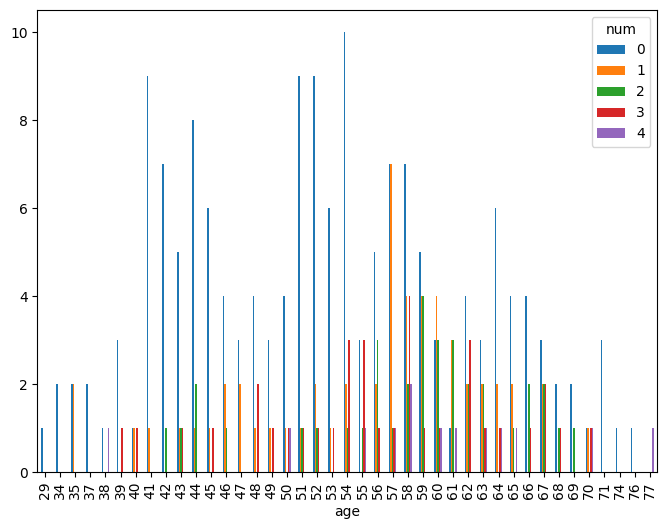

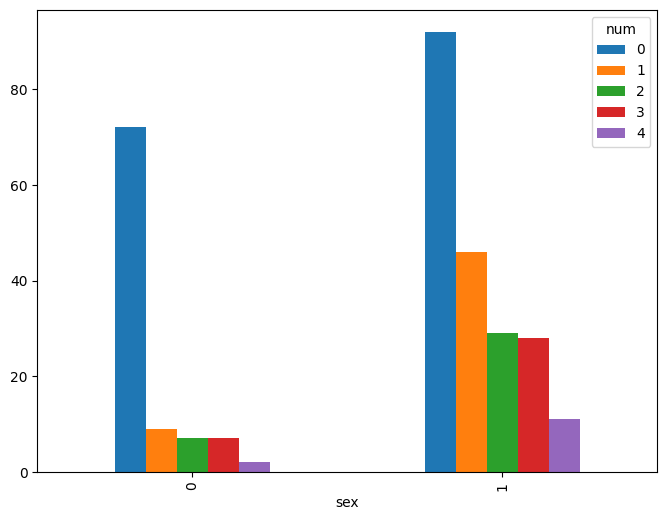

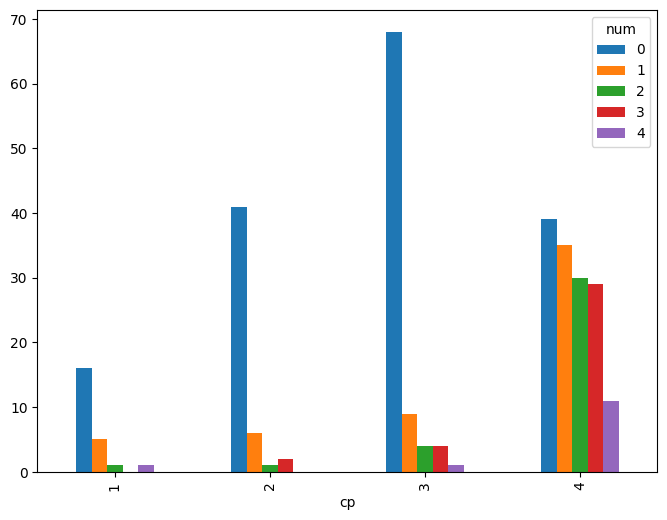

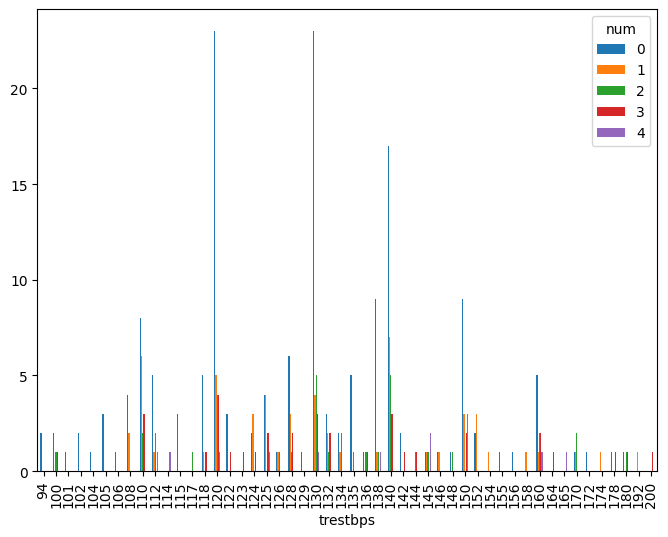

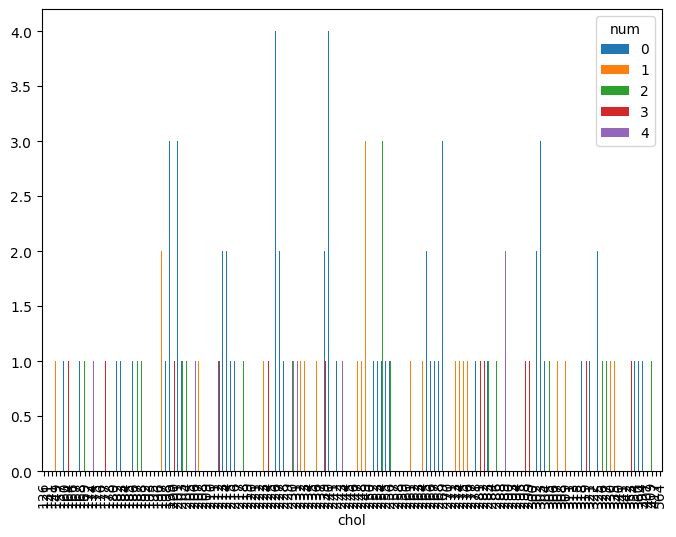

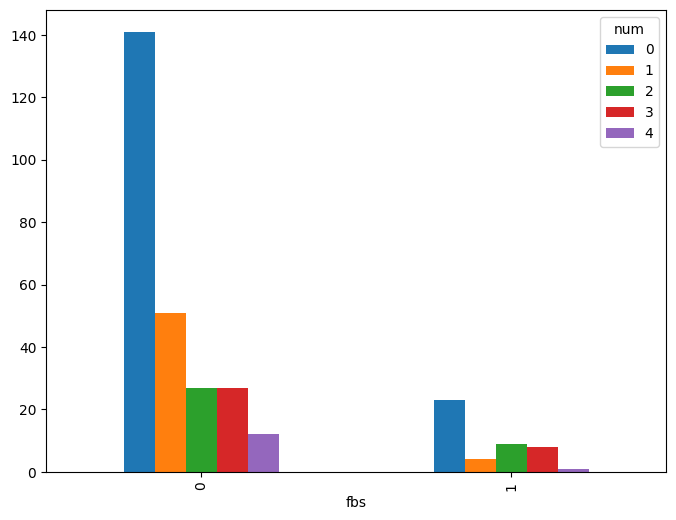

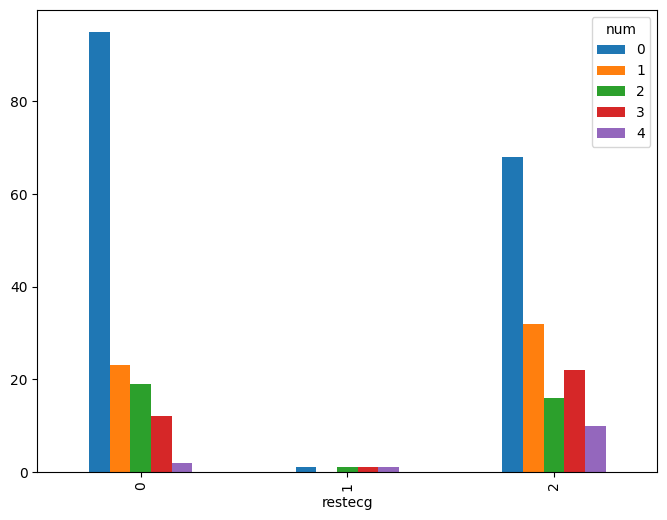

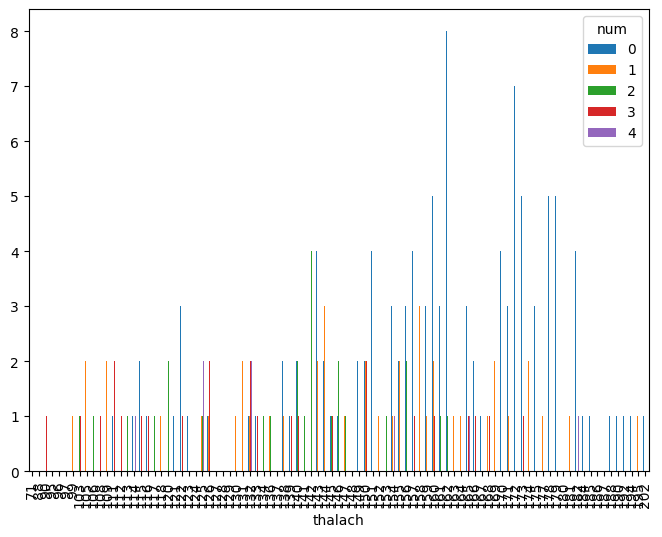

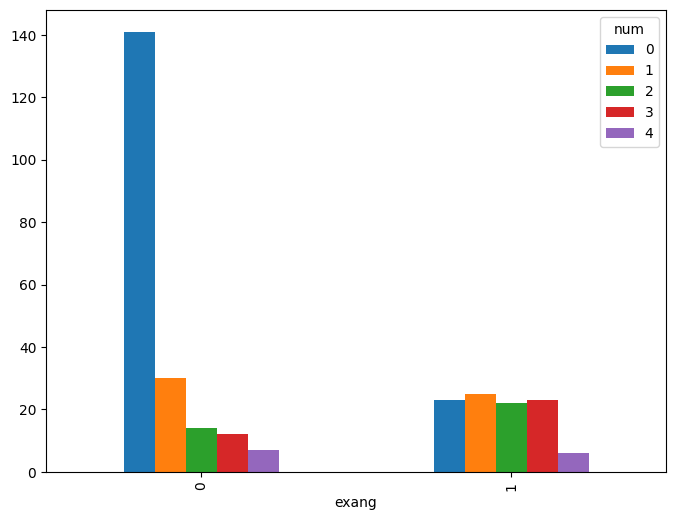

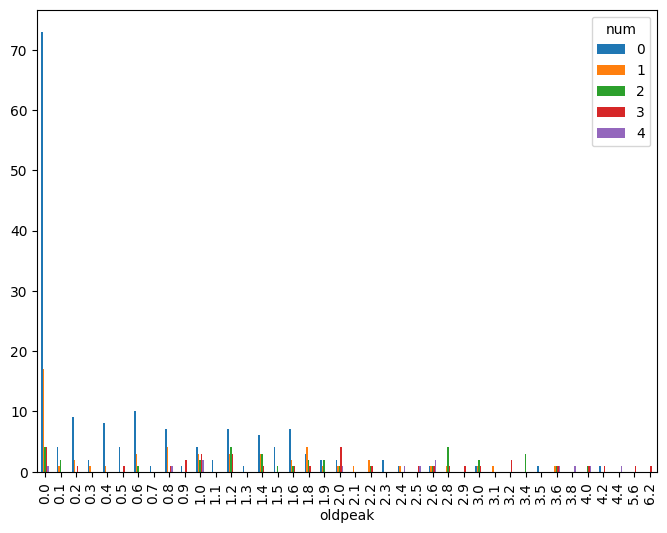

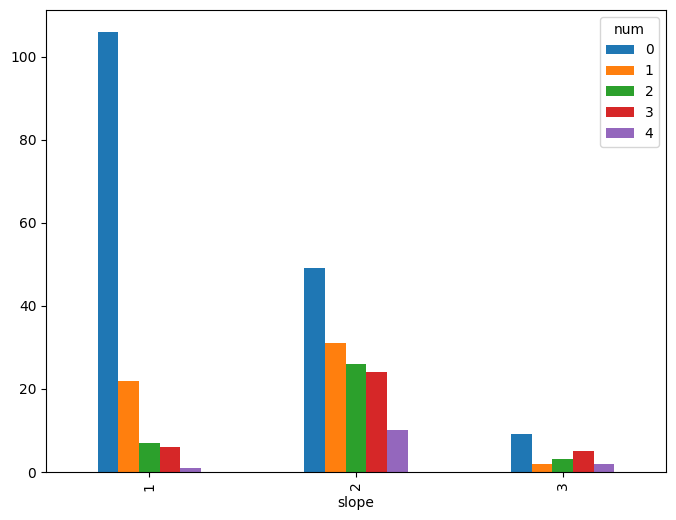

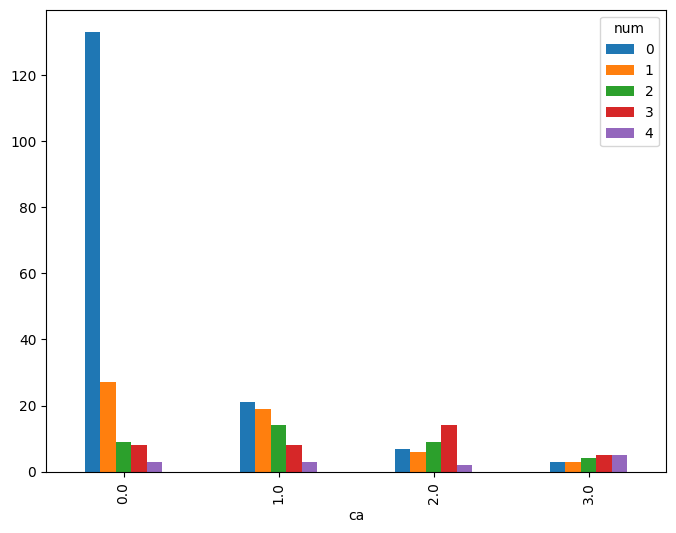

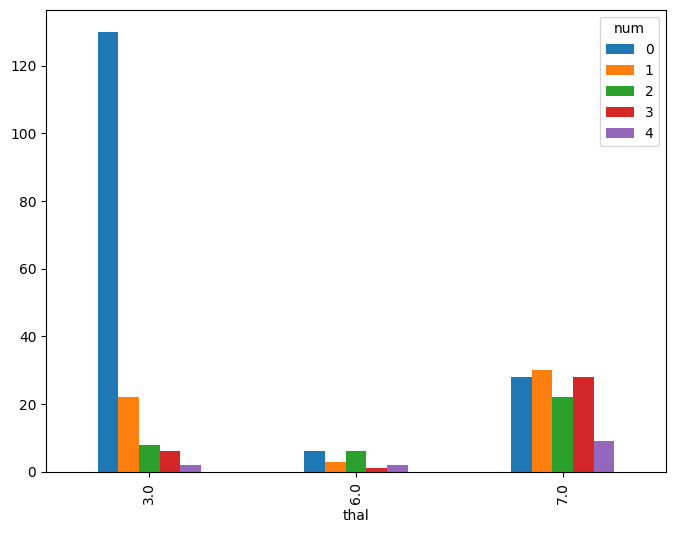

In [ ]:
cols = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']
for i in cols:
  data.groupby(i)['num'].value_counts().unstack().plot.bar(figsize=(8,6))

# **Choosing model**

Разобьем выборку на обучающую и тестовую

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
283,35,1,2,122,192,0,0,174,0,0.0,1,0.0,3.0
95,52,1,4,128,255,0,0,161,1,0.0,1,1.0,7.0
36,43,1,4,120,177,0,2,120,1,2.5,2,0.0,7.0
27,66,0,1,150,226,0,0,114,0,2.6,3,0.0,3.0
220,41,0,3,112,268,0,2,172,1,0.0,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,60,0,3,102,318,0,0,160,0,0.0,1,1.0,3.0
46,51,1,3,110,175,0,0,123,0,0.6,1,0.0,3.0
182,42,1,1,148,244,0,2,178,0,0.8,1,2.0,3.0
185,63,0,2,140,195,0,0,179,0,0.0,1,2.0,3.0


In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
230,52,0,3,136,196,0,2,169,0,0.1,2,0.0,3.0
84,52,1,2,120,325,0,0,172,0,0.2,1,0.0,3.0
209,62,0,4,150,244,0,0,154,1,1.4,2,0.0,3.0
65,60,1,4,145,282,0,2,142,1,2.8,2,2.0,7.0
89,51,0,3,130,256,0,2,149,0,0.5,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,59,1,3,126,218,1,0,134,0,2.2,2,1.0,6.0
205,45,1,4,142,309,0,2,147,1,0.0,2,3.0,7.0
117,35,0,4,138,183,0,0,182,0,1.4,1,0.0,3.0
93,44,0,3,108,141,0,0,175,0,0.6,2,0.0,3.0


In [ ]:
y_train

283    0
95     1
36     3
27     0
220    0
      ..
149    0
46     0
182    0
185    0
234    0
Name: num, Length: 242, dtype: int64

In [ ]:
y_test

230    0
84     0
209    1
65     2
89     0
      ..
267    2
205    3
117    0
93     0
114    2
Name: num, Length: 61, dtype: int64

Рассмотрим несколько моделей и выберем более подходящую для нашей задачи

Дерево решений.
Превосходная точность, но только на тренировочной выборке. На тестовой ответы практически случайные.

In [ ]:
modelDecTree=tree.DecisionTreeClassifier(criterion="log_loss")
modelDecTree.fit(X_train,y_train)
modelDecTree.score(X_train,y_train)

1.0

In [ ]:
modelDecTree.score(X_test,y_test)

0.5081967213114754

Случайный лес.
Уже ниже точность на тренировочной выборке. На тестовой ответы лучше чем у дерева.

In [ ]:
modelRanForest = RandomForestClassifier(n_estimators=2000, max_depth=5, random_state=0)
clfRF =  modelRanForest.fit(X_train,y_train)
acc = (clfRF.predict(X_train)==y_train).sum()/y_train.shape[0]
acc

0.9049586776859504

In [ ]:
acc = (clfRF.predict(X_test)==y_test).sum()/y_test.shape[0]
acc

0.639344262295082

Градиентный бустинг.
Похожие значения точности на случайный лес. Исследуем в дальнейшем обе этих модели.

In [ ]:
modelGradBoosting = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.01, max_depth=5, random_state=0, loss='log_loss')
clfGB = modelGradBoosting.fit(X_train,y_train)
(clfGB.predict(X_train)==y_train).sum()/y_train.shape[0]

1.0

In [ ]:
(clfGB.predict(X_test)==y_test).sum()/y_test.shape[0]

0.6229508196721312

eXtreme gradient boosting.
Наилучшие результаты из всех моделей, наш фаворит.

In [ ]:
modelXGB = xgb.XGBClassifier(
    num_class=5,
    max_depth=5,
    learning_rate=0.05,
    n_estimators=2000
)

clfXGB = modelXGB.fit(X_train,y_train)
(clfXGB.predict(X_train)==y_train).sum()/y_train.shape[0]

1.0

In [ ]:
(clfXGB.predict(X_test)==y_test).sum()/y_test.shape[0]

0.6557377049180327

Функция для кроссвалидации

In [ ]:
def crossval(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = np.array([(p==y_test).sum()/y_test.shape[0] for p in clf.staged_predict(X_test)])
        scor.append(q)
    return np.array(scor)

In [ ]:
def crossval_rf(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = (clf.predict(X)==y).sum()/y.shape[0]
        scor.append(q)
    return np.array(scor)

In [ ]:
crossval_rf(X,y, modelRanForest, 5)

array([0.81848185, 0.81518152, 0.82838284, 0.85148515, 0.81518152])

In [ ]:
crossval(X,y, modelGradBoosting, 5)

array([[0.57377049, 0.57377049, 0.57377049, ..., 0.49180328, 0.49180328,
        0.49180328],
       [0.40983607, 0.40983607, 0.40983607, ..., 0.36065574, 0.36065574,
        0.36065574],
       [0.59016393, 0.59016393, 0.59016393, ..., 0.63934426, 0.63934426,
        0.63934426],
       [0.58333333, 0.58333333, 0.58333333, ..., 0.58333333, 0.58333333,
        0.58333333],
       [0.55      , 0.55      , 0.55      , ..., 0.6       , 0.6       ,
        0.6       ]])

In [ ]:
crossval(X,y, modelXGB, 5)

# **Evaluating the accuracy of models**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Применим ADABoost к выбранным классификаторам и посмотрим улучшит ли это их метрики

In [ ]:
clf1 = AdaBoostClassifier(modelRanForest).fit(X_train.to_numpy(),y_train.to_numpy())
clf2 = AdaBoostClassifier(modelGradBoosting).fit(X_train.to_numpy(),y_train.to_numpy())

In [ ]:
acc1 = (clf1.predict(X_test)==y_test).sum()/y_test.shape[0]
acc1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


0.5901639344262295

In [ ]:
acc2 = (clf2.predict(X_test)==y_test).sum()/y_test.shape[0]
acc2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


0.6065573770491803

In [ ]:
clf3 = AdaBoostClassifier(modelXGB).fit(X_train.to_numpy(),y_train.to_numpy())
acc3 = (clf3.predict(X_test)==y_test).sum()/y_test.shape[0]
acc3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


0.5409836065573771

Macro F1 - это невзвешенное среднее значение баллов F1, рассчитанных для каждого класса. Это самая простая агрегация для оценки F1.


Micro F1 - это обычная формула F1, но рассчитывается с использованием общего количества истинно положительных результатов (TP), ложноположительных результатов (FP) и ложноотрицательных результатов (FN), а не индивидуально для каждого класса.

Micro F1 хуже работает на несбалансированных наборах данных, чем Macro F1. Причина этого в том, что micro F1 придает одинаковую важность каждому наблюдению, в то время как macro F1 придает каждому классу одинаковую важность.

Weighted F1 рассчитывается путем взятия среднего значения всех F1 для каждого класса с учетом поддержки каждого класса. Поддержка относится к количеству фактических вхождений класса в набор данных.

Однако, когда имеешь дело с несбалансированным набором данных и стремишься придать больший вес классам с более крупными примерами, Weighted значение оказывается предпочтительнее. Этот подход корректирует вклад каждого класса в среднее значение F1 в зависимости от его размера, предлагая более сбалансированную перспективу.

In [ ]:
y_true = y_test
y_pred= clf1.predict(X_test)
macrof1 = f1_score(y_true, y_pred, average='macro')
microf1 = f1_score(y_true, y_pred, average='micro')
weighf1 = f1_score(y_true, y_pred, average='weighted')
print('F1macro=', macrof1, 'F1micro=', microf1, 'F1weighted=', weighf1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


F1macro= 0.2961879975505205 F1micro= 0.5901639344262295 F1weighted= 0.561410157308785


In [ ]:
y_true = y_test
y_pred= clf2.predict(X_test)
macrof1 = f1_score(y_true, y_pred, average='macro')
microf1 = f1_score(y_true, y_pred, average='micro')
weighf1 = f1_score(y_true, y_pred, average='weighted')
print('F1macro=', macrof1, 'F1micro=', microf1, 'F1weighted=', weighf1)

F1macro= 0.35964141122035853 F1micro= 0.6065573770491803 F1weighted= 0.5971119475864947


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [ ]:
y_true = y_test
y_pred= clf3.predict(X_test)
macrof1 = f1_score(y_true, y_pred, average='macro')
microf1 = f1_score(y_true, y_pred, average='micro')
weighf1 = f1_score(y_true, y_pred, average='weighted')
print('F1macro=', macrof1, 'F1micro=', microf1, 'F1weighted=', weighf1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


F1macro= 0.14042553191489365 F1micro= 0.5409836065573771 F1weighted= 0.3798395535402861


In [ ]:
y_true = y_test
y_pred= clfRF.predict(X_test)
macrof1 = f1_score(y_true, y_pred, average='macro')
microf1 = f1_score(y_true, y_pred, average='micro')
weighf1 = f1_score(y_true, y_pred, average='weighted')
print('F1macro=', macrof1, 'F1micro=', microf1, 'F1weighted=', weighf1)


F1macro= 0.3666921313980137 F1micro= 0.639344262295082 F1weighted= 0.5901138398727599


In [ ]:
y_true = y_test
y_pred= clfGB.predict(X_test)
macrof1 = f1_score(y_true, y_pred, average='macro')
microf1 = f1_score(y_true, y_pred, average='micro')
weighf1 = f1_score(y_true, y_pred, average='weighted')
print('F1macro=', macrof1, 'F1micro=', microf1, 'F1weighted=', weighf1)

F1macro= 0.36470588235294116 F1micro= 0.6229508196721312 F1weighted= 0.6022179363548696


In [ ]:
y_true = y_test
y_pred= clfXGB.predict(X_test)
macrof1 = f1_score(y_true, y_pred, average='macro')
microf1 = f1_score(y_true, y_pred, average='micro')
weighf1 = f1_score(y_true, y_pred, average='weighted')
print('F1macro=', macrof1, 'F1micro=', microf1, 'F1weighted=', weighf1)

F1macro= 0.40500072264778153 F1micro= 0.6557377049180327 F1weighted= 0.624028868001867


Лучше всего в решении поставленной задачи себя показывает XGBoost без каких-либо надстроек.

# **Conclusion**


Приняв во внимание остальные результаты можем составить такой топ моделей для данной задачи:


1.   XGBoost
2.   GDBoost
3.   ADABoost + GDBoost
4.   RandomForest
5.   ADABoost + RandomForest
6.   ADABoost + XGBoost



